In [58]:
import pickle
from matplotlib import pyplot as plt
from pathlib import Path

In [59]:
# Network Throughput Comparison Across All Configurations

def load_config_data(config_name):
    """Load the latest pickle file for a given configuration"""
    config_dir = Path('.') / config_name
    if not config_dir.exists():
        return None
    
    # Get the latest pickle file
    pkl_files = sorted(list(config_dir.glob('*.pkl')) + list(config_dir.glob('*.pickle')), 
                      key=lambda p: p.stat().st_mtime)
    if not pkl_files:
        return None
    
    latest = pkl_files[-1]
    print(f"Loading {config_name}: {latest.name}")
    
    with latest.open('rb') as fh:
        return pickle.load(fh)

# Get all configuration directories
results_dir = Path('.')
config_dirs = [d.name for d in results_dir.iterdir() if d.is_dir() and not d.name.startswith('.')]

print(f"Found configurations: {config_dirs}")

# Load data for all configurations
all_configs_data = {}
for config in config_dirs:
    data_config = load_config_data(config)
    if data_config is not None:
        all_configs_data[config] = data_config

print(f"Successfully loaded data for: {list(all_configs_data.keys())}")

Found configurations: ['default_config', '64_16h_4channels_DA', '256_16h_4channels_DA', '256_16h_4channels', 'DA+BMAC', '64_16h_4channels']
Loading default_config: default_config_results_20250906_163542.pkl
Loading 64_16h_4channels_DA: 64_16h_4channels_DA_results_20250906_165353.pkl
Loading 256_16h_4channels_DA: 256_16h_4channels_DA_results_20250906_164907.pkl
Loading 256_16h_4channels: 256_16h_4channels_results_20250906_164313.pkl
Loading DA+BMAC: DA+BMAC_results_20250906_163017.pkl
Loading 64_16h_4channels: 64_16h_4channels_results_20250906_165646.pkl
Successfully loaded data for: ['default_config', '64_16h_4channels_DA', '256_16h_4channels_DA', '256_16h_4channels', 'DA+BMAC', '64_16h_4channels']


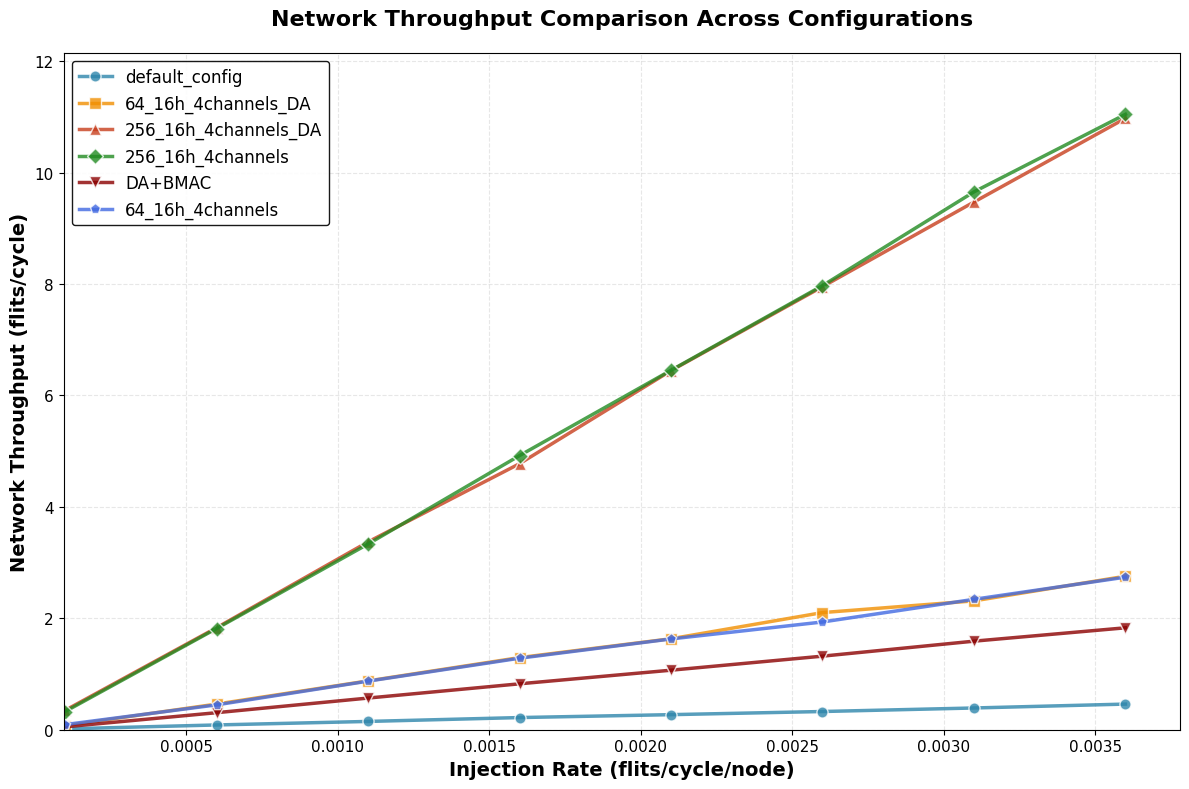

In [60]:
# Create the comparison plot
plt.figure(figsize=(12, 8))

# Define colors and markers for different configurations
colors = ['#2E86AB', '#F18F01', '#C73E1D', '#228B22', '#8B0000', '#4169E1']
markers = ['o', 's', '^', 'D', 'v', 'p']

for i, (config_name, config_data) in enumerate(all_configs_data.items()):
    # Extract data
    injection_rates = list(config_data.keys())
    throughput_values = [config_data[k]['network_throughput'] for k in injection_rates]
    
    # Plot with unique style for each config
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    
    plt.plot(injection_rates, throughput_values, f'{marker}-', 
             linewidth=2.5, markersize=8, color=color, 
             markerfacecolor=color, markeredgecolor='white', 
             markeredgewidth=1, label=config_name, alpha=0.8)

# Styling
plt.xlabel('Injection Rate (flits/cycle/node)', fontsize=14, fontweight='bold')
plt.ylabel('Network Throughput (flits/cycle)', fontsize=14, fontweight='bold')
plt.title('Network Throughput Comparison Across Configurations', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=12, loc='upper left', framealpha=0.9, edgecolor='black')

# Improve ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add some padding to axes
if all_configs_data:
    all_injection_rates = []
    all_throughputs = []
    for config_data in all_configs_data.values():
        all_injection_rates.extend(config_data.keys())
        all_throughputs.extend([config_data[k]['network_throughput'] for k in config_data.keys()])
    
    plt.xlim(min(all_injection_rates) * 0.95, max(all_injection_rates) * 1.05)
    plt.ylim(0, max(all_throughputs) * 1.1)

plt.tight_layout()
plt.show()

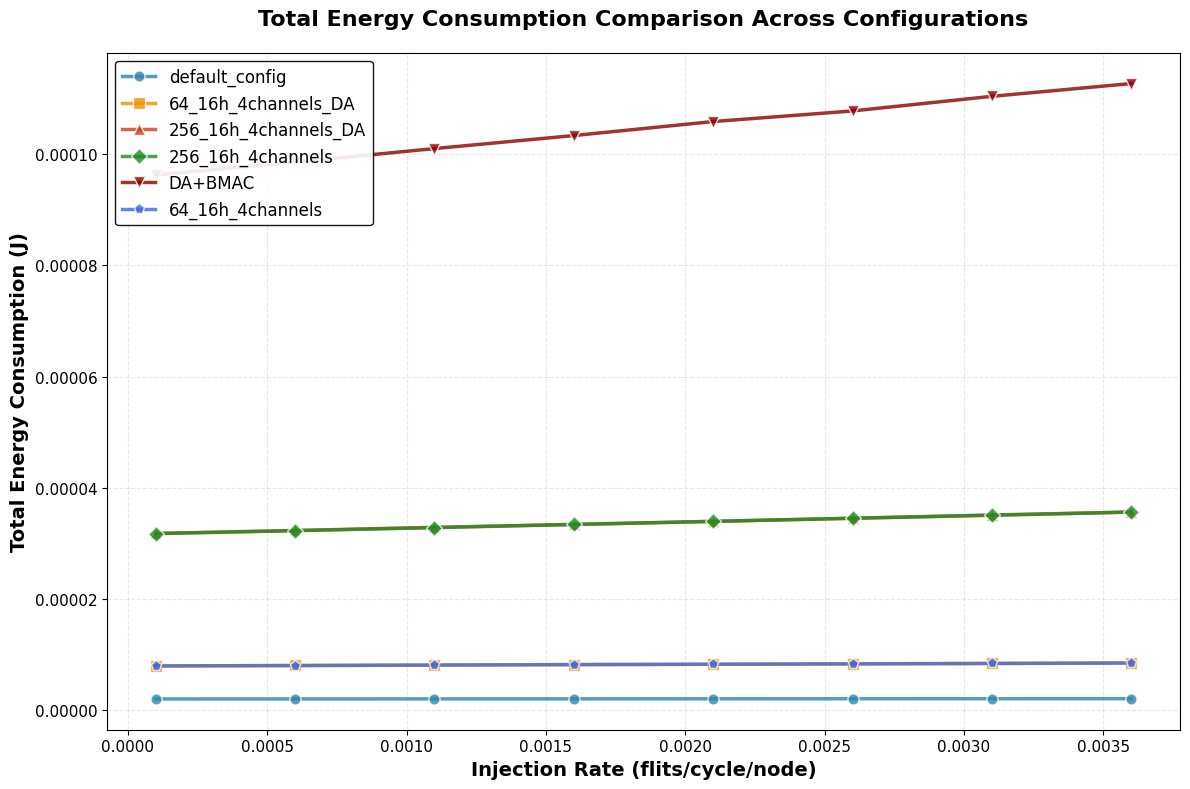

In [61]:
# Energy Consumption Comparison Across All Configurations

# 1. Total Energy Comparison
plt.figure(figsize=(12, 8))

colors = ['#2E86AB', '#F18F01', '#C73E1D', '#228B22', '#8B0000', '#4169E1']
markers = ['o', 's', '^', 'D', 'v', 'p']

for i, (config_name, config_data) in enumerate(all_configs_data.items()):
    injection_rates = list(config_data.keys())
    total_energy = [config_data[k]['total_energy'] for k in injection_rates]
    
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    
    plt.plot(injection_rates, total_energy, f'{marker}-', 
             linewidth=2.5, markersize=8, color=color, 
             markerfacecolor=color, markeredgecolor='white', 
             markeredgewidth=1, label=config_name, alpha=0.8)

plt.xlabel('Injection Rate (flits/cycle/node)', fontsize=14, fontweight='bold')
plt.ylabel('Total Energy Consumption (J)', fontsize=14, fontweight='bold')
plt.title('Total Energy Consumption Comparison Across Configurations', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=12, loc='upper left', framealpha=0.9, edgecolor='black')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()